In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
env = GridworldEnv('1') # Number of task 

/Users/maxja/miniconda3/envs/distral/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


# Q-Learning 

In [3]:
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [4]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.99 # reward discount
TAU=0.5
LEARNING_COUNT = 300
TEST_COUNT = 100
BETA=1/TAU

TURN_LIMIT = 1000
record=True
from algorithms.Q_Learning import Q_Learning_Agents

env = GridworldEnv('1')
env.reset()
agents = Q_Learning_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    if j==3000:
        epsilon = agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon,True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning/{h}.gif".format(h=j), writer="pillow")
    else:
        epsilon = agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon)
        print("GAME "+str(j)+"\n")

    #print(reward_1)
    #print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

###### LEARNING #####
GAME 0

GAME 1

GAME 2

GAME 3

GAME 4

GAME 5

GAME 6

GAME 7

GAME 8

GAME 9

GAME 10

GAME 11

GAME 12

GAME 13

GAME 14

GAME 15

GAME 16

GAME 17

GAME 18

GAME 19

GAME 20

GAME 21

GAME 22

GAME 23

GAME 24

GAME 25

GAME 26

GAME 27

GAME 28

GAME 29

GAME 30

GAME 31

GAME 32

GAME 33

GAME 34

GAME 35

GAME 36

GAME 37

GAME 38

GAME 39

GAME 40

GAME 41

GAME 42

GAME 43

GAME 44

GAME 45

GAME 46

GAME 47

GAME 48

GAME 49

GAME 50

GAME 51

GAME 52

GAME 53

GAME 54

GAME 55

GAME 56

GAME 57

GAME 58

GAME 59

GAME 60

GAME 61

GAME 62

GAME 63

GAME 64

GAME 65

GAME 66

GAME 67

GAME 68

GAME 69

GAME 70

GAME 71

GAME 72

GAME 73

GAME 74

GAME 75

GAME 76

GAME 77

GAME 78

GAME 79

GAME 80

GAME 81

GAME 82

GAME 83

GAME 84

GAME 85

GAME 86

GAME 87

GAME 88

GAME 89

GAME 90

GAME 91

GAME 92

GAME 93

GAME 94

GAME 95

GAME 96

GAME 97

GAME 98

GAME 99

GAME 100

GAME 101

GAME 102

GAME 103

GAME 104

GAME 105

GAME 106

GAME 107

GAME 108

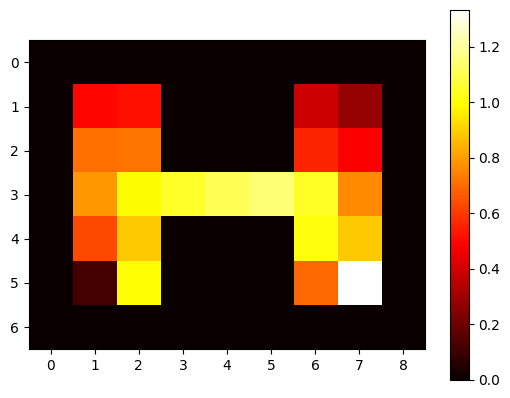

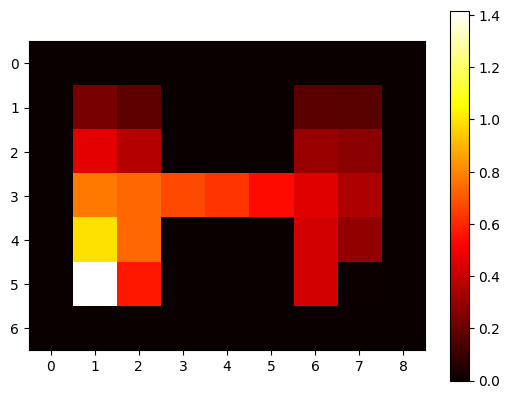

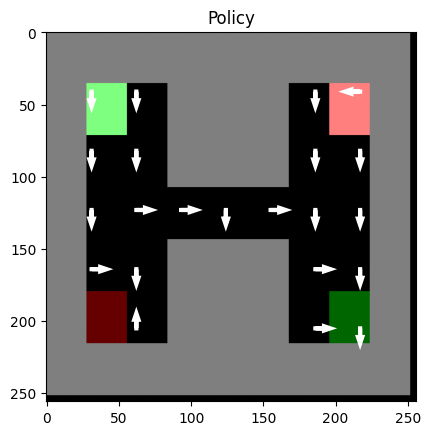

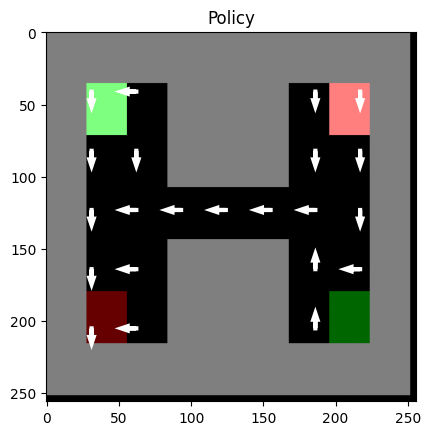

In [5]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

# Q-Learning with rollout

In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [7]:
# Q learning params
ALPHA = 0.2 # learning rate
GAMMA = 0.99 # reward discount
LEARNING_COUNT = 300
TEST_COUNT = 100

TURN_LIMIT = 1000
from algorithms.Q_learning_rollout import Q_Learning_Rollout_Agents


env = GridworldEnv('1')
env.reset()
agents = Q_Learning_Rollout_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,10)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    if j==1050:
        epsilon=agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon,True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning_rollout/{h}.gif".format(h=j), writer="pillow")
    else:
        epsilon=agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(epsilon)
        print("GAME "+str(j)+"\n")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

###### LEARNING #####
GAME 0

21.60000000000018
22.200000000000145
GAME 1

74.99999999999991
53.59999999999961
GAME 2

92.00000000000001
47.29999999999952
GAME 3

25.79999999999994
88.60000000000002
GAME 4

69.89999999999984
72.19999999999987
GAME 5

61.699999999999726
72.39999999999988
GAME 6

57.89999999999967
67.59999999999981
GAME 7

86.30000000000004
84.60000000000004
GAME 8

63.99999999999976
51.89999999999959
GAME 9

52.09999999999959
45.7999999999995
GAME 10

55.79999999999964
63.099999999999746
GAME 11

54.49999999999962
91.50000000000001
GAME 12

2.1000000000012875
94.0
GAME 13

90.60000000000002
93.10000000000001
GAME 14

10.600000000000804
84.90000000000003
GAME 15

-99.29999999999863
76.49999999999994
GAME 16

48.49999999999954
92.30000000000001
GAME 17

85.20000000000003
93.5
GAME 18

95.1
79.89999999999998
GAME 19

-99.59999999999862
89.00000000000003
GAME 20

89.80000000000003
81.9
GAME 21

93.4
96.8
GAME 22

-99.9999999999986
98.5
GAME 23

35.09999999999941
79.69999999

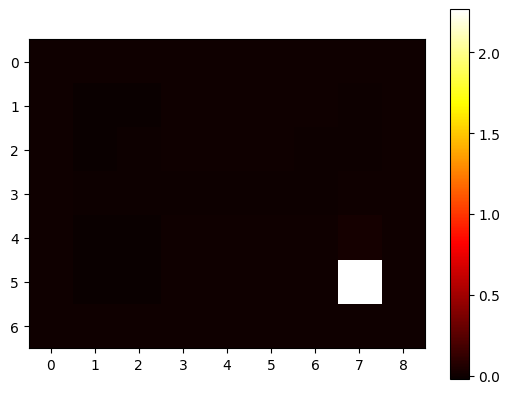

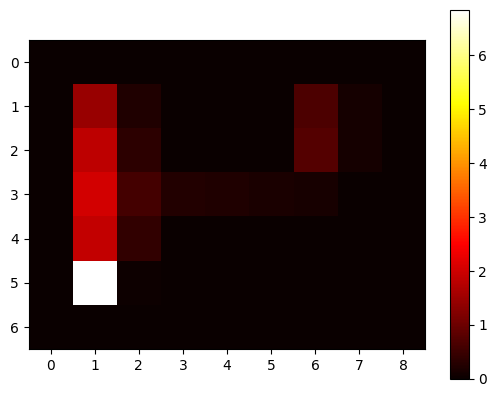

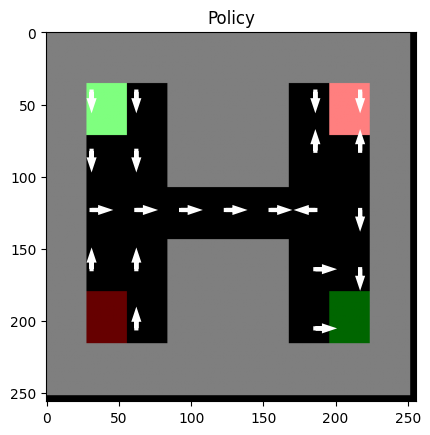

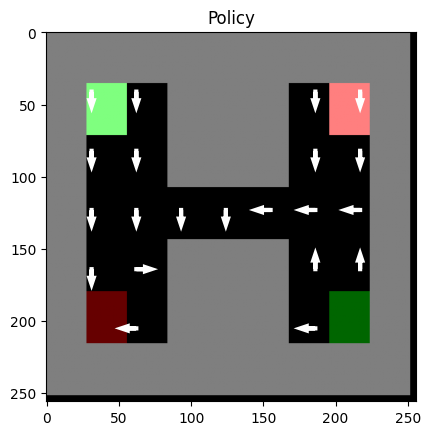

In [8]:
Q_a1 = agents.q_val_1
Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

# Soft Q-Learning with rollout

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [10]:
# Q learning params
ALPHA = 0.1 # learning rate
GAMMA = 0.99 # reward discount
TAU=0.5
LEARNING_COUNT = 300
TEST_COUNT = 100

TURN_LIMIT = 100
from algorithms.Soft_Q_Learning_Baseline import Soft_Q_Learning_Baseline_Agents


env = GridworldEnv('1')
env.reset()
agents = Soft_Q_Learning_Baseline_Agents(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,TAU)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    #TAU-=0.003
    if j==1050:
        total_reward,reward_1,reward_2=agents.learn(True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning_rollout/{h}.gif".format(h=j), writer="pillow")
    else:
        #epsilon=agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn()
        print("GAME "+str(j)+"\n")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

/Users/maxja/miniconda3/envs/distral/lib/python3.9/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


###### LEARNING #####
GAME 0

-9.99999999999998
98.4
GAME 1

-9.299999999999983
-9.299999999999983
GAME 2

-9.599999999999982
-9.599999999999982
GAME 3

-9.99999999999998
-9.299999999999983
GAME 4

-9.199999999999983
92.4
GAME 5

-9.89999999999998
93.4
GAME 6

-9.499999999999982
-9.499999999999982
GAME 7

-9.99999999999998
-9.499999999999982
GAME 8

-9.89999999999998
-9.89999999999998
GAME 9

-9.799999999999981
-9.499999999999982
GAME 10

-9.399999999999983
-9.99999999999998
GAME 11

-9.499999999999982
-9.99999999999998
GAME 12

-9.89999999999998
-9.499999999999982
GAME 13

-9.89999999999998
-9.599999999999982
GAME 14

91.30000000000001
-9.89999999999998
GAME 15

-9.89999999999998
-9.89999999999998
GAME 16

-9.89999999999998
91.00000000000001
GAME 17

-9.499999999999982
91.10000000000002
GAME 18

-9.799999999999981
-9.99999999999998
GAME 19

96.9
-9.99999999999998
GAME 20

-9.699999999999982
-9.399999999999983
GAME 21

-9.199999999999983
-9.399999999999983
GAME 22

91.70000000000002
-9

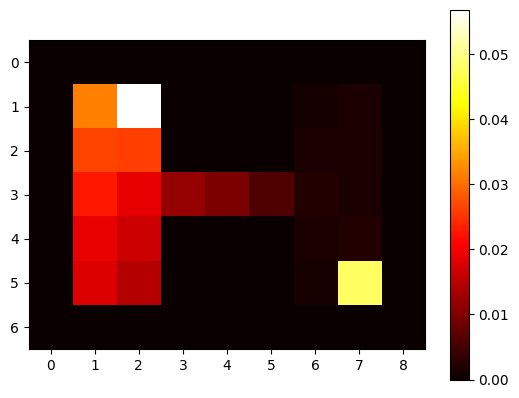

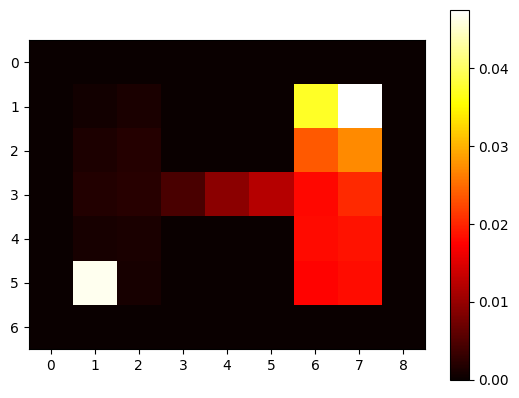

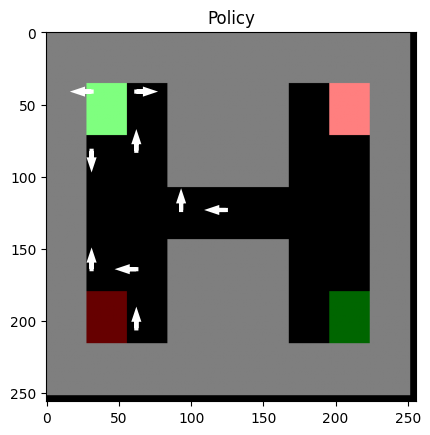

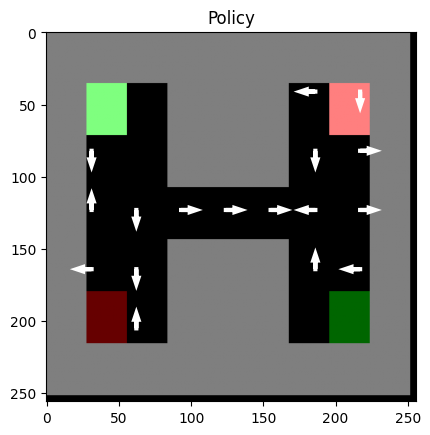

In [11]:
Q_a1 = agents.q_val_1

Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)

# Soft Q-Learning without rollout

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from gridworld_env import GridworldEnv
import matplotlib.pyplot as plt
import matplotlib.animation as animation

def updatefig(j):
    # set the data in the axesimage object
    im.set_array(env.grid_images[j])
    # return the artists set
    return [im]

In [13]:
# Q learning params
ALPHA = 0.1 # learning rate
GAMMA = 0.95 # reward discount
TAU=1
LEARNING_COUNT = 300
TEST_COUNT = 100

TURN_LIMIT = 500
from algorithms.Soft_Q_Learning_without_rollout import Soft_without_rollout


env = GridworldEnv('1')
env.reset()
agents = Soft_without_rollout(env,LEARNING_COUNT,TURN_LIMIT,ALPHA,GAMMA,TAU)

print("###### LEARNING #####")
reward_total_1 = 0.0
reward_total_2 = 0.0
for j in range(LEARNING_COUNT):
    #TAU-=0.003
    if j==1050:
        total_reward,reward_1,reward_2=agents.learn(j, record=True)
        print("GAME "+str(j)+"\n")
        fig = plt.figure() # make figure

        # make axesimage object
        # the vmin and vmax here are very important to get the color map correct
        im = plt.imshow(env.grid_images[0])
        # kick off the animation
        ani = animation.FuncAnimation(fig, updatefig, frames=range(len(env.grid_images)),interval=50)
        ani.save(filename="images/q_learning_rollout/{h}.gif".format(h=j), writer="pillow")
    else:
        #epsilon=agents.update_epsilon(j)
        total_reward,reward_1,reward_2=agents.learn(j)
        print("GAME "+str(j)+"\n")

    print(reward_1)
    print(reward_2)
    reward_total_1 += reward_1
    reward_total_2 += reward_2
print("episodes      : {}".format(LEARNING_COUNT))
print("agent 1 total reward  : {}".format(reward_total_1))
print("agent 1 average reward: {:.2f}".format(reward_total_1 / LEARNING_COUNT))
#print("agent 1 Q Value       :{}".format(agent.q_val))
print("agent 2 total reward  : {}".format(reward_total_2))
print("agent 2 average reward: {:.2f}".format(reward_total_2 / LEARNING_COUNT))

###### LEARNING #####
GAME 0

-49.90000000000044
91.60000000000001
GAME 1

-50.00000000000044
-50.00000000000044
GAME 2

-50.00000000000044
-49.600000000000435
GAME 3

-50.00000000000044
-50.00000000000044
GAME 4

-50.00000000000044
97.7
GAME 5

-50.00000000000044
-50.00000000000044
GAME 6

-49.90000000000044
-50.00000000000044
GAME 7

-50.00000000000044
-50.00000000000044
GAME 8

-49.600000000000435
-50.00000000000044
GAME 9

-49.80000000000044
92.80000000000001
GAME 10

-50.00000000000044
90.30000000000001
GAME 11

-50.00000000000044
-50.00000000000044
GAME 12

-49.50000000000043
94.8
GAME 13

-49.80000000000044
-50.00000000000044
GAME 14

-49.90000000000044
-50.00000000000044
GAME 15

-49.600000000000435
-50.00000000000044
GAME 16

-50.00000000000044
-50.00000000000044
GAME 17

50.19999999999956
-50.00000000000044
GAME 18

-49.80000000000044
-50.00000000000044
GAME 19

-49.600000000000435
90.80000000000001
GAME 20

-49.80000000000044
-50.00000000000044
GAME 21

-50.00000000000044
91

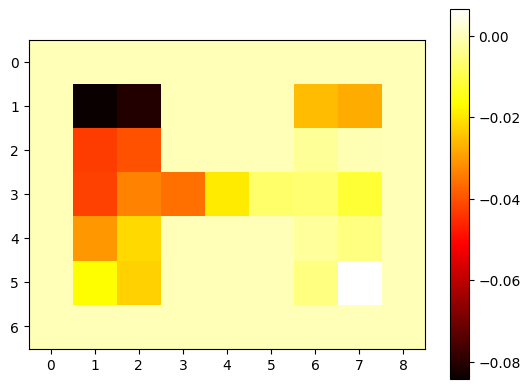

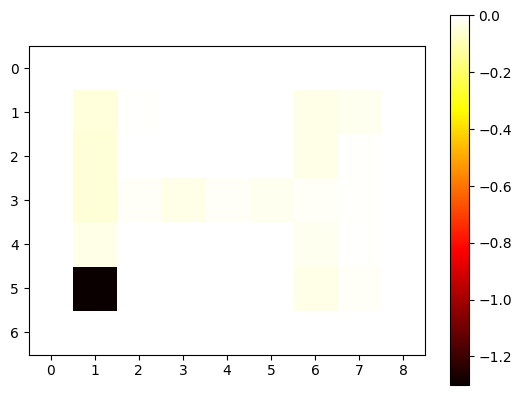

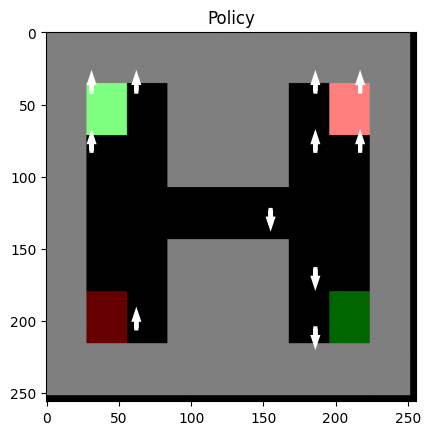

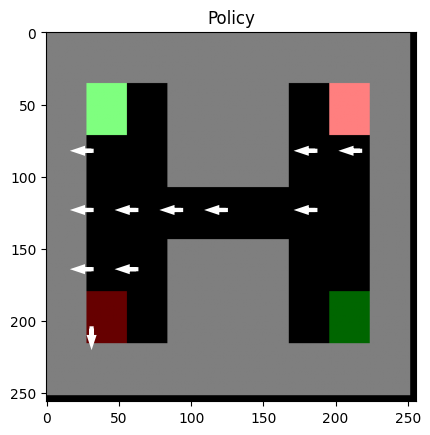

In [14]:
Q_a1 = agents.q_val_1

Q_a1_fixed_p2=Q_a1[:,:,5,1,:,:,:]
#Q_a1_fixed_p2=Q_a1
Q_a1_mean=np.mean(Q_a1_fixed_p2,axis=tuple(i for i in range(Q_a1_fixed_p2.ndim) if i != 0 and i!=1 and i!=4))

#print(Q_a1_mean[:,:,0])
policy_function1 = np.argmax(Q_a1_mean , axis = 2)

Q_a2 = agents.q_val_2 
Q_a2_fixed_p1=Q_a2[5,7,:,:,:,:,:]
#Q_a2_fixed_p1=Q_a2
#print(Q_a2_fixed_p1.shape)
Q_a2_mean=np.mean(Q_a2_fixed_p1,axis=tuple(i for i in range(Q_a2_fixed_p1.ndim) if i != 0 and i!=1 and i!=4))

#print([i for i in range(Q_a2_fixed_p1.ndim) if (i != 0 and i!=1)])
Q1=np.mean(agents.q_val_1,axis=tuple(i for i in range(agents.q_val_1.ndim) if (i != 0 and i!=1)))

#Q1=np.mean(Q1,axis=(2,3))
plt.figure()
plt.imshow(Q1, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



Q=np.mean(agents.q_val_2,axis=tuple(i for i in range(agents.q_val_2.ndim) if (i != 2 and i!=3)))
#print(Q.shape)
#Q=np.mean(Q,axis=(2,3))
policy_function2 = np.argmax( Q_a2_mean , axis = 2)
plt.figure()
plt.imshow(Q, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()



def plot_policy( policy_function ):

    #plt.figure()
    env.reset()
    img=env.render('rgb_array')

    plt.imshow( img.astype('float')/255.0)

    
    for row in range( policy_function.shape[0] ):
        for col in range( policy_function.shape[1] ):
            if policy_function[row,col] == 0:
                continue 
            if policy_function[row,col] == 1:
                dx = 0; dy = .5
            if policy_function[row,col] == 2:
                dx = 0; dy = -.5
            if policy_function[row,col] == 3:
                dx = -.5; dy = 0
            if policy_function[row,col] == 4:
                dx = .5; dy = 0
            plt.arrow( col*31 , row*41 , dx*12, dy*12 ,shape='full', fc='w' , ec='w' ,lw=3, head_width=3)
            #plt.quiver(col*31,row*40,dx,dy ,color=(1.0,1.0,1.0))
    plt.title( 'Policy' )        
    plt.show() 
plot_policy(policy_function1)
plot_policy(policy_function2)